In [1]:
%config Completer.use_jedi = False

from utils import *
from parallel import to_run, findpos, find_relaxation

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import importlib
from multiprocessing import Pool
from tqdm.notebook import tqdm
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.dpi"] = 72
plt.rcParams["figure.figsize"] = [12,8]

from ising_model import SimulateMH

In [2]:
pool = Pool(32)

In [3]:
scale = 80
times = 100

# Ts = np.concatenate([
#     np.linspace(0,1.8,scale),
#     np.linspace(1.8,3.5,5*scale),
#     np.linspace(3.5,6,scale),
# ])
Ts1=np.linspace(0,4.5,scale+1)[1:]
Ts = [Ts1]*times

In [4]:
results = []
for Ts1 in tqdm(Ts):
    runs = len(Ts1)
    res = pool.starmap(find_relaxation, #T, N, steps, SEED
            zip(*(Ts1,
                  [32]*runs, # N,
                  [32]*runs, # M
                  [3*10**6]*runs, # steps
                  np.random.randint(0,1000000, runs), # seed
                      )),
#             chunksize=1
        )
    results+= res

  0%|          | 0/100 [00:00<?, ?it/s]

In [3]:
import pickle

In [5]:
len(results)

8000

In [6]:
df = pd.DataFrame(results, columns=["T",  "RTM_const", "RTE_const", "RTM_rand", "RTE_rand"])

In [7]:
gb = df.groupby("T")

In [8]:
dfmoments = pd.concat([
gb.mean().add_suffix("_mean"),
gb.std().add_suffix("_std")], axis=1)
dfm = dfmoments[sorted(dfmoments.columns)]

In [9]:
sprs=2

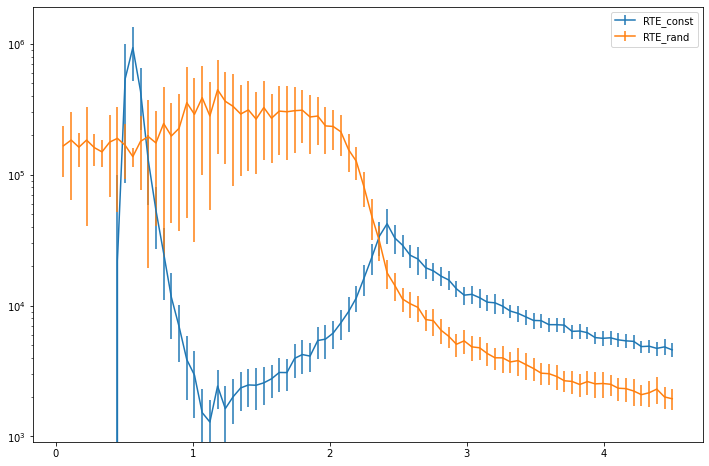

In [10]:
plt.errorbar(dfm.index, dfm.RTE_const_mean, yerr=dfm.RTE_const_std/sprs, label="RTE_const")
plt.errorbar(dfm.index, dfm.RTE_rand_mean, yerr=dfm.RTE_rand_std/sprs, label="RTE_rand")
plt.gca().set_yscale("log")
plt.legend()


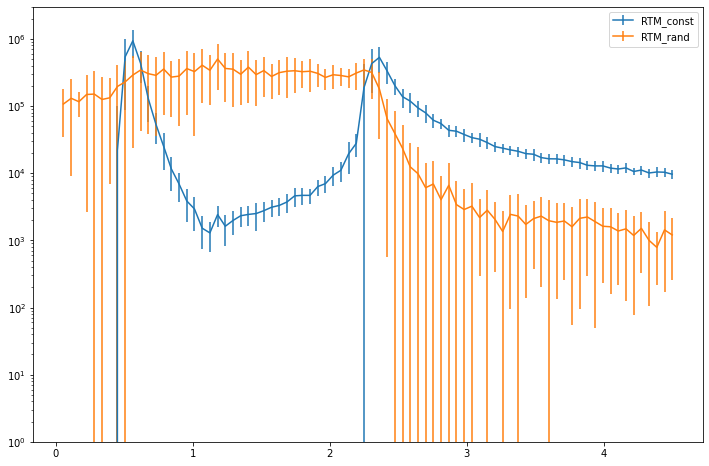

In [11]:
plt.errorbar(dfm.index, dfm.RTM_const_mean, yerr=dfm.RTM_const_std/sprs, label="RTM_const")
plt.errorbar(dfm.index, dfm.RTM_rand_mean, yerr=dfm.RTM_rand_std/sprs, label="RTM_rand")
plt.gca().set_yscale("log")
plt.ylim(1,3*10**6)
plt.legend()

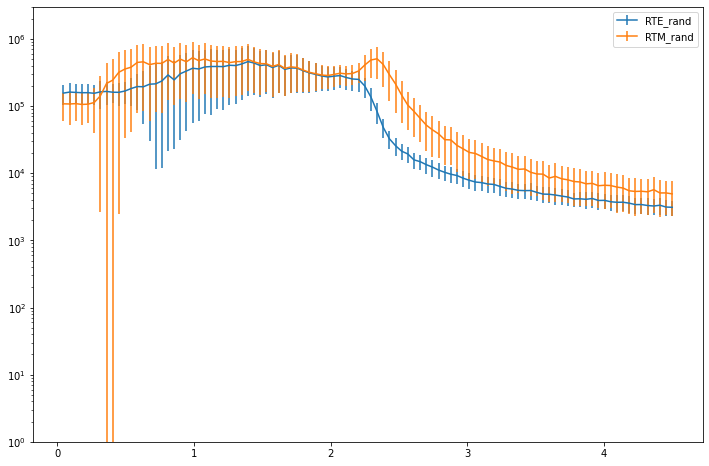

In [22]:
# plt.errorbar(dfm.index, dfm.RTE_const_mean, yerr=dfm.RTE_const_std/sprs, label="RTE_const")
plt.errorbar(dfm.index, dfm.RTE_rand_mean, yerr=dfm.RTE_rand_std/sprs, label="RTE_rand")
# plt.errorbar(dfm.index, dfm.RTM_const_mean, yerr=dfm.RTM_const_std/sprs, label="RTM_const")
plt.errorbar(dfm.index, dfm.RTM_rand_mean, yerr=dfm.RTM_rand_std/sprs, label="RTM_rand")
plt.gca().set_yscale("log")
plt.ylim(1,3*10**6)
plt.legend()

<AxesSubplot:>

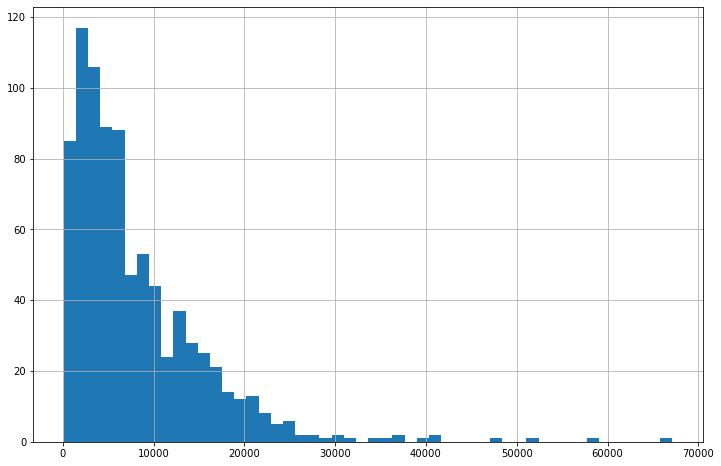

In [16]:
gb.get_group(1.035).RTM_const.hist(bins=50)

# Debug area

In [29]:
Mss_rand  = []
Mss_const = []
Ess_rand  = []
Ess_const = []
T = 2.35
steps = 1_000_000

for _ in tqdm(range(10)):
    SEED = np.random.randint(100000000)
    _,_,Ms, Es, engine = to_run(1, steps, T=T, N=32,M=32, freq=max(1,steps//10**5), 
                            SEED=SEED, return_engine=True, 
                            init="random")
    Mss_rand.append(Ms)
    Ess_rand.append(Es)
    
    SEED = np.random.randint(100000000)
    _,_,Ms, Es, engine = to_run(1, steps, T=T, N=32,M=32, freq=max(1,steps//10**5), 
                            SEED=SEED, return_engine=True, 
                            init="constant")
    Mss_const.append(Ms)
    Ess_const.append(Es)
    

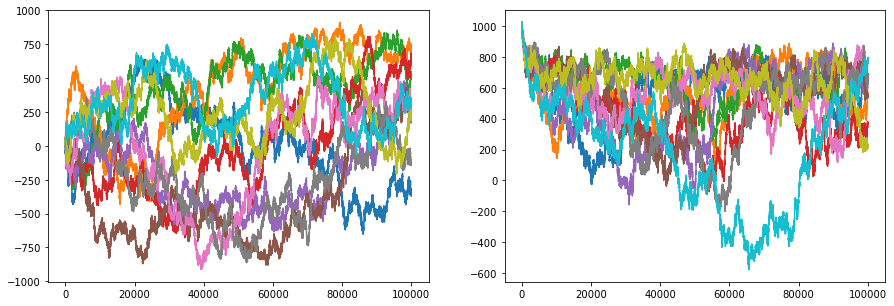

In [30]:
till=-1#1000
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(np.array(Mss_rand).T[:till]);
plt.subplot(122)
plt.plot(np.array(Mss_const).T[:till]);

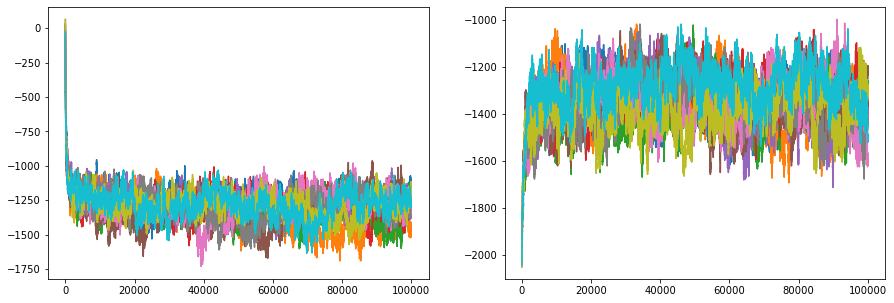

In [31]:
till=-1#1000
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(np.array(Ess_rand).T[:till]);
plt.subplot(122)
plt.plot(np.array(Ess_const).T[:till]);